<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-5-Project-Week/blob/master/DS_151_Project_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


| | Total games | Home Team Won | Home Team Lost | Home Team Win % | Highest Elo Won | Highest Elo Lost | Highest Elo Win % | Home & Highest Elo Won | Home & Highest Elo Lost | Home & Highest Elo Win % |
| - - - - - -|: - - - - - -:|: - - - - - - -:|: - - - - - - - :|: - - - - - - - -:|: - - - - - - - -:|: - - - - - - - - :|: - - - - - - - - -:|: - - - - - - - - - - - :|: - - - - - - - - - - - -:|: - - - - - - - - - - - - :|
| 1946–2018 | 68,324 | 41,877 | 26,447 | 61.3% | 43,407 | 24,917 | 63.5% | 42,561 | 25,763 | 62.3% |
| 2018 | 1312 | 770 | 542 | 58.7% | 822 | 490 | 62.6% | 839 | 473 | 64% |



Test sliding graph

In [1]:
!pip install bokeh

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh

from matplotlib.patches import Circle, Rectangle, Arc

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook

In [0]:
#!pip install --upgrade seaborn

In [0]:
import seaborn as sns 

In [4]:
sns.__version__

'0.9.0'

In [5]:
# Load dataset from FiveThirthyEight
url = 'https://projects.fivethirtyeight.com/nba-model/nba_elo.csv'
nba_data = pd.read_csv(url) # Import dataset from assigned url
#Convert date column to datetime format
nba_data['date'] = pd.to_datetime(nba_data['date']) 

# Look at the rows/columns and general statistical data
print(nba_data.shape)
nba_data.describe()

(68324, 24)


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,67513.000000,67513.000000,5167.000000,5167.000000,4356.000000,4356.000000,5167.000000,5167.000000,1230.000000,1230.000000,1230.000000,1230.000000,67513.000000,67513.000000
mean,1990.414291,0.000439,1496.288016,1496.531512,0.621179,0.378821,1496.136852,1496.476494,1512.575773,1510.894765,1512.382461,1512.510714,0.626522,0.373478,1515.438276,1515.336623,0.620753,0.379247,104.736984,101.052360
std,18.594788,0.020950,112.324567,111.759812,0.178141,0.178141,112.904855,112.062393,117.272056,116.854678,119.046575,118.107722,0.191837,0.191837,117.423577,117.342069,0.200572,0.200572,14.833883,14.283531
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,1281.328778,1276.551561,0.120228,0.038478,2.000000,0.000000
25%,1976.000000,0.000000,1418.910550,1419.052850,0.498848,0.240510,1417.841700,1418.807900,1438.930652,1438.193630,1434.249496,1435.686432,0.494466,0.219772,1437.271517,1437.271517,0.467752,0.210659,95.000000,92.000000
50%,1992.000000,0.000000,1501.683749,1502.847900,0.640018,0.359982,1501.540900,1502.436000,1510.130092,1510.017503,1510.308068,1512.149768,0.652341,0.347659,1519.041607,1519.041607,0.646761,0.353239,105.000000,101.000000
75%,2006.000000,0.000000,1576.590325,1576.036450,0.759490,0.501152,1576.694200,1576.254200,1587.273733,1584.419717,1585.665584,1583.582698,0.780228,0.505534,1609.128145,1609.128145,0.789341,0.532248,114.000000,110.000000
max,2019.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,1765.838659,1767.243578,0.961522,0.879772,184.000000,186.000000


In [0]:
# Create a function to add highest elo win yes(1) or no(0)
def f(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    elif (row['score2'] > row['score1']) & (row['elo2_pre'] > row['elo1_pre']):
        val = 1
    else:
        val = 0
    return val
  
# Create a function to check if home team won
def h(row):
    if (row['score1'] > row['score2']):
        val = 1
    else:
        val = 0
    return val
  
# Create a function to check if home and higher elo team won
def j(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
nba_data['elo_win'] = nba_data.apply(f, axis=1)
nba_data['home_win'] = nba_data.apply(h, axis=1)
nba_data['home_elo'] = nba_data.apply(j, axis=1)

In [8]:
nba_data.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,...,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2,elo_win,home_win,home_elo
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,67513.000000,67513.000000,5167.000000,5167.000000,...,5167.000000,1230.000000,1230.000000,1230.000000,1230.000000,67513.000000,67513.000000,68324.000000,68324.000000,68324.000000
mean,1990.414291,0.000439,1496.288016,1496.531512,0.621179,0.378821,1496.136852,1496.476494,1512.575773,1510.894765,...,0.373478,1515.438276,1515.336623,0.620753,0.379247,104.736984,101.052360,0.635340,0.612976,0.377100
std,18.594788,0.020950,112.324567,111.759812,0.178141,0.178141,112.904855,112.062393,117.272056,116.854678,...,0.191837,117.423577,117.342069,0.200572,0.200572,14.833883,14.283531,0.481338,0.487073,0.484664
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,...,0.013407,1281.328778,1276.551561,0.120228,0.038478,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,0.000000,1418.910550,1419.052850,0.498848,0.240510,1417.841700,1418.807900,1438.930652,1438.193630,...,0.219772,1437.271517,1437.271517,0.467752,0.210659,95.000000,92.000000,0.000000,0.000000,0.000000
50%,1992.000000,0.000000,1501.683749,1502.847900,0.640018,0.359982,1501.540900,1502.436000,1510.130092,1510.017503,...,0.347659,1519.041607,1519.041607,0.646761,0.353239,105.000000,101.000000,1.000000,1.000000,0.000000
75%,2006.000000,0.000000,1576.590325,1576.036450,0.759490,0.501152,1576.694200,1576.254200,1587.273733,1584.419717,...,0.505534,1609.128145,1609.128145,0.789341,0.532248,114.000000,110.000000,1.000000,1.000000,1.000000
max,2019.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,...,0.939526,1765.838659,1767.243578,0.961522,0.879772,184.000000,186.000000,1.000000,1.000000,1.000000


In [0]:
print(nba_data.elo_win.cumsum())
print(len(nba_data.elo_win))

In [0]:
nba_rolling_elo1pre = nba_data.elo1_pre.rolling(window=2).mean()
nba_rolling_elo2pre = nba_data.elo2_pre.rolling(window=2).mean()
nba_rolling_elo1post = nba_data.elo1_post.rolling(window=2).mean()
nba_rolling_elo2post = nba_data.elo2_post.rolling(window=2).mean()

In [11]:
bokeh.__version__

'1.0.2'

In [12]:
output_notebook()
dates = nba_data.date
source = ColumnDataSource(data=dict(date=dates, close=nba_data['elo1_pre']))



p = figure(plot_height=300, plot_width=800, tools="", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1500], dates[2500]))

# p.xaxis.major_label_overrides = {
#     i: date.strftime('%b %d') for i, date in enumerate(pd.to_datetime(df["date"]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Pregame Elo'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_rool = RangeTool(x_range=p.x_range)
range_rool.overlay.fill_color = "red"
range_rool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool


show(column(p, select))

Loading BokehJS ...

###Work with 2018 data only

In [13]:
# Select only data from 2017-2018 season
nba_data[nba_data['season'] == 2018]['elo1_pre'].mean()

1513.7851224779074

In [0]:
nba_2018 = nba_data[nba_data['season'] == 2018]

In [63]:
# Calculate the average Pregame Elo rating for the home team
# Produces a list which is not what I really want
# elo1_pre_avg = [nba_data[nba_data['season'] == yr]['elo1_pre'].mean()
#                  for yr in nba_data.season.unique() ]
#dtype(elo1_pre)

elo1_pre_avg = nba_data.groupby('season').elo1_pre.mean()

elo1_pre_avg

season
1947    1305.894873
1948    1404.245880
1949    1444.397028
1950    1457.529007
1951    1506.722854
1952    1509.408950
1953    1506.092095
1954    1509.028108
1955    1536.407299
1956    1528.479027
1957    1525.334916
1958    1517.506241
1959    1516.150019
1960    1508.698060
1961    1507.994613
1962    1480.159115
1963    1488.482548
1964    1498.421750
1965    1500.927482
1966    1501.931121
1967    1479.329127
1968    1388.188350
1969    1412.280502
1970    1433.761357
1971    1435.119269
1972    1457.876067
1973    1475.219813
1974    1482.112626
1975    1484.031957
1976    1496.079418
           ...     
1990    1485.557589
1991    1491.723845
1992    1498.722035
1993    1501.190377
1994    1505.393768
1995    1505.764652
1996    1494.099208
1997    1501.532146
1998    1503.397775
1999    1507.412588
2000    1505.793200
2001    1506.737493
2002    1509.247637
2003    1509.452282
2004    1512.131158
2005    1504.688997
2006    1506.373353
2007    1507.174061
2008    1510.

In [16]:
group_season = nba_data.groupby('season').season.unique()
group_season.shape

(73,)

In [0]:
elo2_pre_avg = nba_data.groupby('season').elo2_pre.mean()
elo2_post_avg = nba_data.groupby('season').elo2_post.mean()
elo1_post_avg = nba_data.groupby('season').elo1_post.mean()


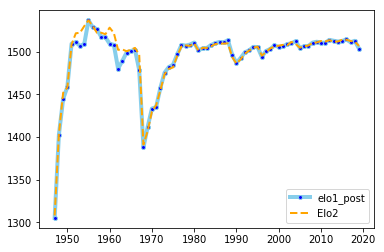

In [18]:
fig = plt.figure()
ax = plt.axes()

x = group_season
#plt.plot(x, elo1_pre_avg);
plt.plot(x, elo1_post_avg, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
# plt.plot(x, elo2_pre_avg, marker='', color='olive', linewidth=2)
plt.plot(x, elo2_post_avg, marker='', color='orange', linewidth=2, linestyle='dashed', label="Elo2")
plt.legend()

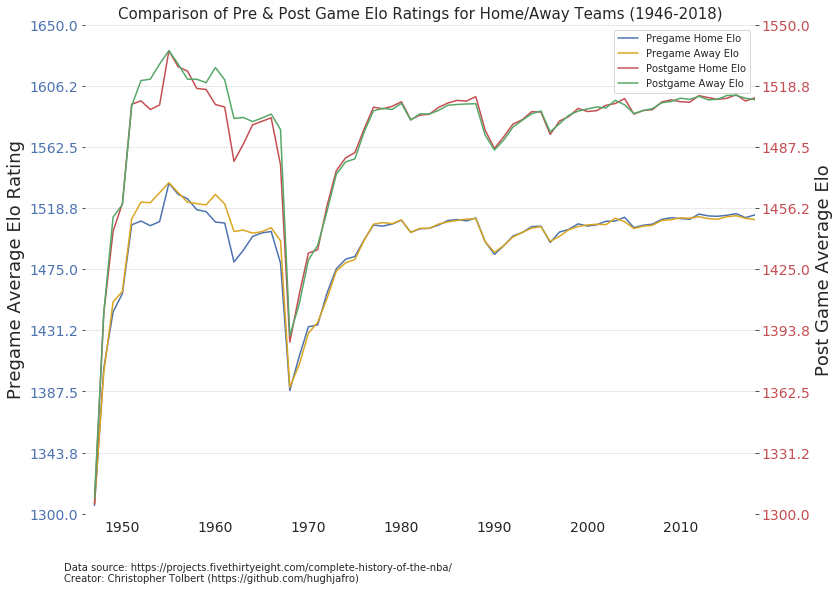

In [62]:
sns.set_style("white")  

# change the mapping of default matplotlib color shorthands
# to default seaborn palette 
sns.set_color_codes()

# set the x and y values for our first line
x_values = group_season
y_values_1 = elo1_pre_avg
y_values_3 = elo2_pre_avg
y_values_4 = elo2_post_avg

# plt.subplots returns a tuple containing a Figure and an Axes
# fig is a Figure object and ax1 is an Axes object
# we can also set the size of our plot
fig, ax1 = plt.subplots(figsize=(12,9))  

title = ('Comparison of Pre & Post Game Elo Ratings for Home/Away Teams'
         ' (1946-2018)')
plt.title(title, fontsize=15)
# plt.xlabel('Elo Home', fontsize=16)

# Create a series of grey dashed lines across each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Change the size of tick labels for x-axis and left y-axis
# to a more readable font size for
plt.tick_params(axis='both', labelsize=14)

# Plot our first line that deals with mean Elo per season
# We assign it to plot 1 to reference later for our legend
# We alse give it a label, in order to use for our legen
plot1 = ax1.plot(x_values, y_values_1, 'b', label='Pregame Home Elo')
plot2 = ax1.plot(x_values, y_values_3, 'goldenrod', label='Pregame Away Elo')
# Create the ylabel for Elo rating line
ax1.set_ylabel('Pregame Average Elo Rating', fontsize=18)
# Set limits for 1st y-axis
ax1.set_ylim(1300, 1650)
# Have tick color match correponding line color
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Now we create the our 2nd Axes object that will share the same x-axis
# To do this we call the twinx() method from our first Axes object
ax2 = ax1.twinx()
y_values_2 = elo1_post_avg
# Create our second line for the number of picks by year
plot3 = ax2.plot(x_values, y_values_2, 'r', label='Postgame Home Elo')
plot4 = ax2.plot(x_values, y_values_4, 'g', label='Postgame Away Elo')
# Create our label for the 2nd y-axis
ax2.set_ylabel('Post Game Average Elo', fontsize=18)
# Set the limit for 2nd y-axis
ax2.set_ylim(1300, 1550)
# Set tick size for second y-axis
ax2.tick_params(axis='y', labelsize=14)
# Have tick color match corresponding line color
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Limit our x-axis values to minimize white space
ax2.set_xlim(1946, 2018)

# create our legend 
# First add our lines together
lines = plot1 + plot2 + plot3 + plot4
# Then create legend by calling legend and getting the label for each line
ax1.legend(lines, [l.get_label() for l in lines])

# Create evenly ligned up tick marks for both y-axis
# np.linspace allows us to get evenly spaced numbers over
# the specified interval given by first 2 arguments,
# Those 2 arguments are the the outer bounds of the y-axis values
# the third argument is the number of values we want to create
# ax1 - create 9 tick values from 1300 to 1650
ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 9))
# ax2 - create 9 tick values from 1300 to 1550
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 9))

# need to get rid of spines for each Axes object
for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  
    
# Create text by calling the text() method from our figure object    
# https://github.com/fivethirtyeight/data/tree/master/nba-elo
fig.text(0.1, 0.02,
         'Data source: https://projects.fivethirtyeight.com/complete-history-of-the-nba/'
        '\nCreator: Christopher Tolbert (https://github.com/hughjafro)'
         ,
          fontsize=10)

plt.show()


In [48]:
ew_group = nba_2018.groupby('elo_win')
he_group = nba_2018.groupby('home_elo')
ew_win = nba_2018[nba_2018['home_elo']==1].sum()
ew_group.describe()

#df[df["class"]==1].sum()["value"]

carm-elo1_post                                                     \
                 count         mean         std          min          25%   
elo_win                                                                     
0                490.0  1504.440504   95.721676  1244.003321  1435.515785   
1                822.0  1518.301203  120.573275  1231.264173  1420.042979   

                                               carm-elo1_pre               \
                 50%          75%          max         count         mean   
elo_win                                                                     
0        1517.845484  1566.867198  1773.535971         490.0  1504.831501   
1        1527.212620  1594.351970  1809.079898         822.0  1520.201226   

          ...   score2        season                                       \
          ...      75%    max  count    mean  std     min     25%     50%   
elo_win   ...                                                               
0         ...    111.0  148.0  490.0  2018.0  0.0  2018.0  2018.0  2018.0   
1         ...    114.0  142.0  822.0  2018.0  0.0  2018.0  2018.0  2018.0   

                         
            75%     max  
elo_win                  
0        2018.0  2018.0  
1        2018.0  2018.0  

[2 rows x 176 columns]

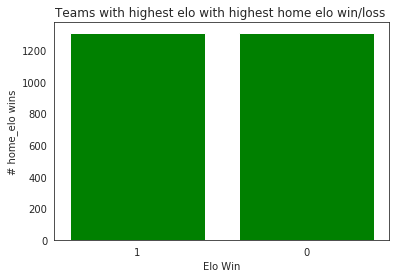

In [54]:
# Can't quite figure this one out to get the count of home_elo  vs 0/1 of elo_win
x2 = ['0','1']
plt.bar(nba_2018.elo_win, nba_2018.home_win.count(), color='green')
plt.xlabel("Elo Win")
plt.ylabel("# home_elo wins")
plt.title("Teams with highest elo with highest home elo win/loss ")

plt.xticks(nba_2018.elo_win, x2)

plt.show()

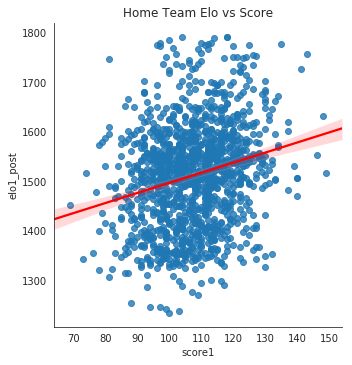

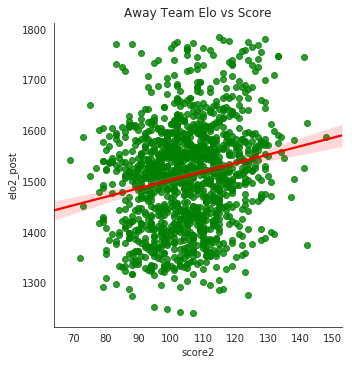

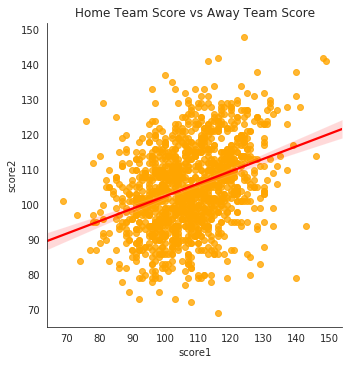

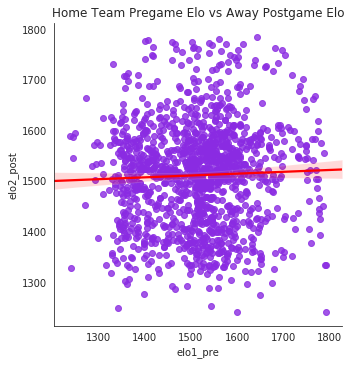

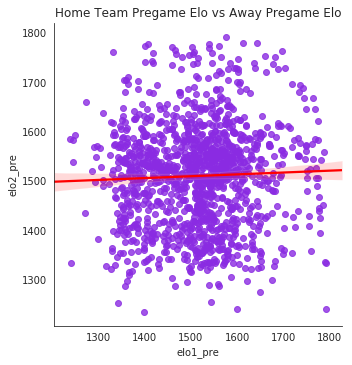

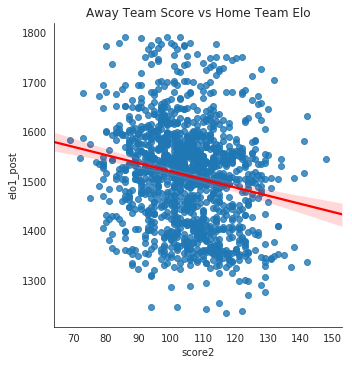

In [61]:
# make a scatterplot
sns.lmplot(x='score1', y='elo1_post', data=nba_2018, line_kws={'color': 'red'});
ax = plt.gca()
ax.set_title("Home Team Elo vs Score")

sns.lmplot(x='score2', y='elo2_post', data=nba_2018, line_kws={'color': 'red'},
           scatter_kws={'color':'green'});
ax = plt.gca()
ax.set_title("Away Team Elo vs Score")

sns.lmplot(x='score1', y='score2', data=nba_2018, line_kws={'color': 'red'},
           scatter_kws={'color':'orange'});
ax = plt.gca()
ax.set_title("Home Team Score vs Away Team Score")

sns.lmplot(x='elo1_pre', y='elo2_post',  data=nba_2018,
           line_kws={'color': 'red'}, scatter_kws={'color':'blueviolet'});
ax = plt.gca()
ax.set_title("Home Team Pregame Elo vs Away Postgame Elo")

sns.lmplot(x='elo1_pre', y='elo2_pre',  data=nba_2018,
           line_kws={'color': 'red'}, scatter_kws={'color':'blueviolet'});
ax = plt.gca()
ax.set_title("Home Team Pregame Elo vs Away Pregame Elo")

sns.lmplot(x='score2', y='elo1_post', data=nba_2018, line_kws={'color': 'red'});
ax = plt.gca()
ax.set_title("Away Team Score vs Home Team Elo");

In [0]:
nba_ew = nba_2018.elo_win.cumsum()
nba_he = nba_2018.home_elo.cumsum()

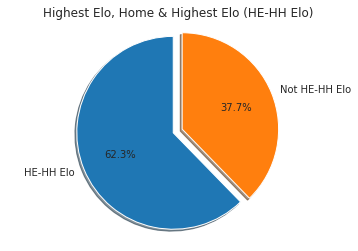

In [60]:
#  Sliced and Ordered Pie chart
labels = 'HE-HH Elo', 'Not HE-HH Elo'
sizes = [42561, 25763]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'HE-HH Elo')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Highest Elo, Home & Highest Elo (HE-HH Elo)')

plt.show()